In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Credit Card Transactions.csv")

In [3]:
data.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [4]:
data = data.drop(['Customer_ID', 'Count'], axis=1)
data.columns

Index(['Status_Checking_Acc', 'Duration_in_Months', 'Credit_History',
       'Purposre_Credit_Taken', 'Credit_Amount', 'Savings_Acc',
       'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans', 'Housing',
       'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment'],
      dtype='object')

In [5]:
data.isnull().sum()

Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
Default_On_Payment             0
dtype: int64

<AxesSubplot:>

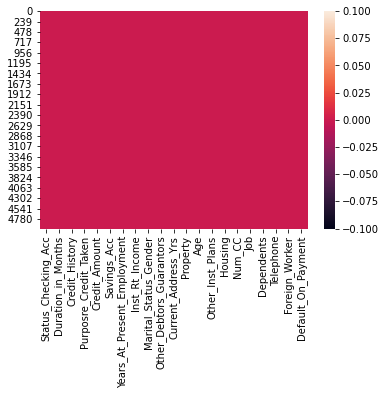

In [6]:
sns.heatmap(data.isnull())

In [7]:
data['Default_On_Payment'].value_counts()

0    3505
1    1495
Name: Default_On_Payment, dtype: int64

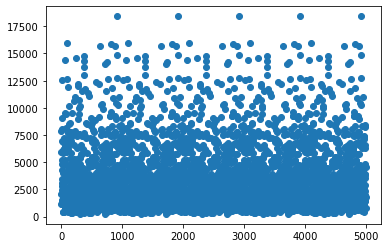

In [8]:
import matplotlib.pyplot as plt
plt.scatter(data.index, data['Credit_Amount'])

In [9]:
li = list(data['Credit_Amount'].sort_values()[-5:].index)
li

[3915, 915, 4915, 1915, 2915]

In [10]:
data = data.drop(li,axis = 0)

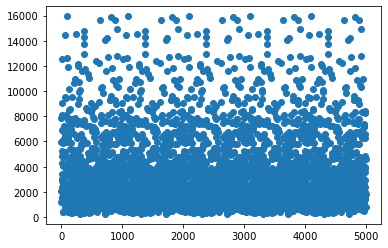

In [11]:
plt.scatter(data.index, data['Credit_Amount'])

In [12]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [13]:
data.reset_index(drop=True,inplace=True)

In [14]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [15]:
encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [16]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,0
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,0
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,0
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,0
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,1


In [17]:
data.Default_On_Payment.value_counts()

0    3505
1    1490
Name: Default_On_Payment, dtype: int64

In [18]:
li = data[data['Default_On_Payment']==0].sample(2000).index
li

Int64Index([3670, 3176, 3033, 2858, 4157, 1731, 1628, 2677, 4179, 4384,
            ...
            2748, 1318, 4400, 1025, 3255, 3017, 2549,  676, 4654, 2766],
           dtype='int64', length=2000)

In [19]:
data = data.drop(li, axis = 0)
data.Default_On_Payment.value_counts()

0    1505
1    1490
Name: Default_On_Payment, dtype: int64

In [20]:
X = data.drop(['Default_On_Payment'], axis=1)
y = data['Default_On_Payment']

###  Training and Testing with Logic Regression


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train the model using 'fit' method
model.fit(X_train, y_train)

# Test the model using 'predict' method
y_pred = model.predict(X_test)

# Print the classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.77      0.74       282
           1       0.78      0.74      0.76       317

    accuracy                           0.75       599
   macro avg       0.75      0.75      0.75       599
weighted avg       0.75      0.75      0.75       599



C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Print the Confusion Matrix
[[216  66]
 [ 84 233]]


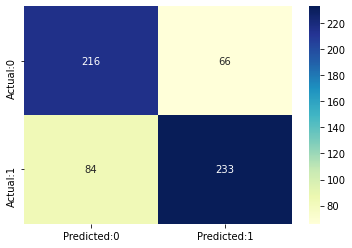

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Print the Confusion Matrix')
print(cm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
#plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [24]:
import pandas as pd
from sklearn import preprocessing, utils
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [25]:
from sklearn import tree
model = tree.DecisionTreeClassifier() 
model.fit(X, y)
model.score(X, y)
#Predict Output
predicted= model.predict(X)
print(metrics.accuracy_score(predicted, y))
print(predicted)
from sklearn.metrics import classification_report
print(classification_report(y, predicted))


1.0
[0 1 0 ... 0 1 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       1.00      1.00      1.00      1490

    accuracy                           1.00      2995
   macro avg       1.00      1.00      1.00      2995
weighted avg       1.00      1.00      1.00      2995



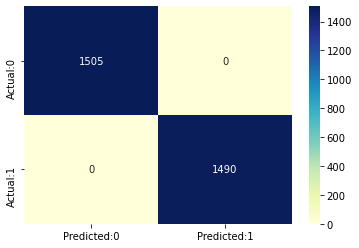

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,predicted)
cm
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
#plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [27]:
from sklearn import ensemble
classifier = ensemble.RandomForestClassifier()
classifier.fit(X, y)


# predict the labels on validation dataset
predictions = classifier.predict(X)
metrics.accuracy_score(predictions, y)
print(metrics.accuracy_score(predicted, y))
print(predictions)
from sklearn.metrics import classification_report
print(classification_report(y,predictions))


1.0
[0 1 0 ... 0 1 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       1.00      1.00      1.00      1490

    accuracy                           1.00      2995
   macro avg       1.00      1.00      1.00      2995
weighted avg       1.00      1.00      1.00      2995



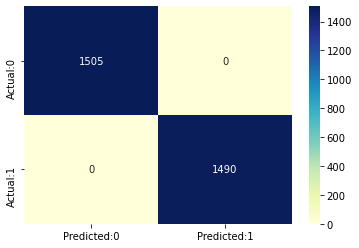

In [28]:
cm=confusion_matrix(y,predictions)
cm
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
#plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [30]:
from sklearn import tree
model = tree.DecisionTreeClassifier() 
model.fit(X_train, y_train)
model.score(X_train, y_train)
#Predict Output
predicted= model.predict(X_test)
print(metrics.accuracy_score(predicted, y_test))
print(predicted)
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))


0.9782971619365609
[1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1
 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0
 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0
 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1
 0 1 1

NAIVE BAYES

In [33]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(X, y) 

GaussianNB()

In [34]:
predicted= model.predict(X)
print(metrics.accuracy_score(predicted, y))
print(predicted)

0.7248747913188648
[0 1 1 ... 0 1 1]


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y, predicted))


              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1505
           1       0.70      0.77      0.74      1490

    accuracy                           0.72      2995
   macro avg       0.73      0.73      0.72      2995
weighted avg       0.73      0.72      0.72      2995



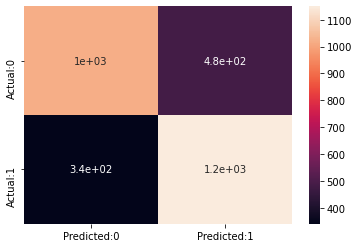

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,predicted)
cm
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
#plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True);